In [1]:
import importlib

In [2]:
import tasks

In [3]:
task = 'normals'

In [4]:
target_task = importlib.import_module(f'tasks.{task}')

In [5]:
target_task.cfg['eval_dir']

'eval/normals'

In [6]:
target_task.cfg['weights_file']

'weights/normals.pth'

In [7]:
cfg_loader = target_task.CfgLoader()

In [8]:
cfg = cfg_loader.get_cfg('cuda')

In [9]:
image_dir = cfg['image_dir']

In [10]:
image_dir

'out'

In [11]:
dataset = cfg['dataset']

In [12]:
img_num = 0

In [13]:
img, target = dataset[img_num]

In [14]:
import sys

In [15]:
print(sys.executable)

/home/agrippa/anaconda3/envs/relighting_pytorch_source/bin/python


In [16]:
import matplotlib.pyplot as plt

In [17]:
import matplotlib.image as mpimg

In [18]:
import numpy as np

In [19]:
img.shape

torch.Size([3, 128, 128])

In [20]:
import torchvision

In [21]:
to_img = (lambda x: (0.5*(x+1)).clamp(0.0,1.0))

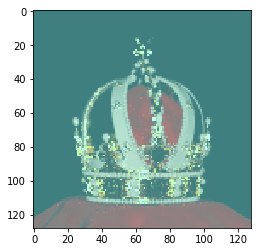

In [22]:
img_plot = plt.imshow(np.transpose(to_img(img).numpy(), (1,2,0)))

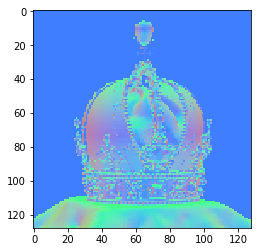

In [23]:
img_plot = plt.imshow(np.transpose(to_img(target).numpy(), (1,2,0)))

In [24]:
model = cfg['model']

In [25]:
weights_file = cfg['weights_file']

In [26]:
import torch

In [27]:
model.load_state_dict(torch.load(f'./{weights_file}'))

In [28]:
model.eval()

EncoderDecoder(
  (encoder): Resnet11Encoder128x128(
    (resnet): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1)

In [29]:
from torch.autograd import Variable

In [30]:
img.view(1,3,128,128).shape

torch.Size([1, 3, 128, 128])

In [31]:
output = model(img.view(1,3,128,128).cuda())

In [32]:
output.shape

torch.Size([1, 3, 128, 128])

In [33]:
output = output.cpu().detach().squeeze()

In [34]:
output.shape

torch.Size([3, 128, 128])

In [35]:
np_output = to_img(output).numpy()

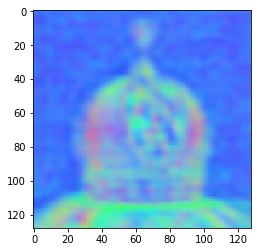

In [36]:
img_plot = plt.imshow(np.transpose(to_img(output).numpy(), (1,2,0)))

In [37]:
dataset.flat_cfg[img_num]

{'at': [3.72811, 87.9981, -82.1874],
 'color': [10000000, 10000000, 10000000],
 'eye': [61.41559999999998, 102.11, -1325.25],
 'fov': 10.1592,
 'light': [61.4156, 102.11, -1325.25],
 'size': [128, 128],
 'spp': 128,
 'up': [-0.0005256740209828103, 0.9999357047659718, 0.011327400452123822],
 'normals': 'normal_0000.png',
 'rendering': 'out-0000-0000.png',
 'i': '0',
 'j': '0'}

In [38]:
criterion = cfg['criterion']

In [39]:
loss = criterion(output, target)

In [40]:
loss

tensor(0.0225)